Непараметрический байесовский классификатор \\
Вариант 2 \\
Выполнил Шамаев Сергей Денисович из группы Б21-514


Пусть есть k = 3 класса из распределения:


$$\frac{С_kZ_k}{||Z_k||}+t_kZ_k, k = 2,3$$ \\
$$Z_k, k = 1$$ \\
$Z_k$ - двумерное круговое нормальное распределение

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [383]:
n = [100, 200, 150]

np.random.seed(14)
X_1 = np.vstack((np.random.multivariate_normal([2, 0], [[0.5, 0], [0, 0.5]], n[0] // 2),
                np.random.multivariate_normal([5, 5], [[0.8, 0], [0, 0.8]], n[0] // 2)))
X_2 = np.vstack((np.random.multivariate_normal([-4, -3], [[2, 0.2], [0.2, 1.2]], n[1] // 4),
                np.random.multivariate_normal([-1, 6], [[2.4, 0.1], [0.1, 1]], n[1] // 4 * 3)))
X_3 = np.vstack((np.random.multivariate_normal([0, 1], [[1, 0.3], [0.3, 2]], n[2] // 2),
                np.random.multivariate_normal([-5, 8], [[1, -0.3], [-0.3, 1]], n[2] // 2)))

In [384]:
#функция нормализации для 2 и 3 класса
def norm(X_0, C_0, t2):
  X_0_norm = np.array([X_0[i] / np.linalg.norm(X_0[i]) for i in range(len(X_0))])
  X_0_res = C_0 * X_0_norm + X_0 * t2
  return X_0_res

In [385]:
X1 = X_1.copy()
X2 = norm(X_2, 1.6, 0.3)
X3 = norm(X_3, 4, 0.2)

X = np.vstack((X1, X2, X3))

In [386]:
k = 3

На данной диаграмме представлены элемнты выборки, каждый класс имеет свой цвет:
 \\
 (1 - красный, 2 - синий, 3 - зелёный) \\
 Можно заметить, что некотрые точки разных классов заходят в чужую зону. Таким образом, полностью распределить точки по классам правильно невозможно (без корректировки данных). Однако, большинство разделить можно. \\
 Как видно из графика (и из формул распределения), данные распределены не нормально, наблюдаются скопления в разных точках, т.е. имеется несколько пиков.

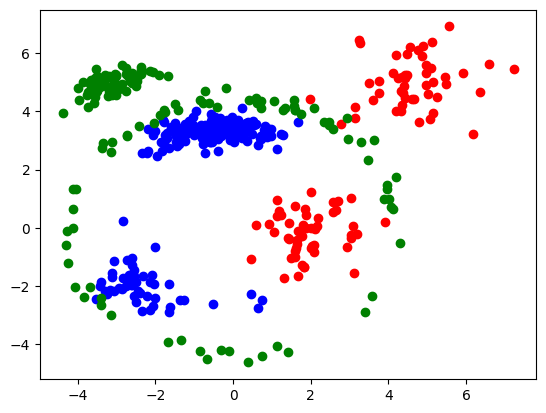

In [387]:
plt.figure()
plt.scatter(X1[:,0], X1[:,1], c='r')
plt.scatter(X2[:,0], X2[:,1], c='b')
plt.scatter(X3[:,0], X3[:,1], c='g')

In [388]:
def histogram(X1, name):
  plt.figure(figsize=(14, 7))
  for i, bin in enumerate([15, 20, 25, 30, 15, 20, 25, 30]):

      # Set up the plot
      ax = plt.subplot(2, 4, i + 1)

      # Draw the plot
      if i < 4:
        ax.hist(X1[:, 0], bins = bin, color = 'blue', edgecolor = 'black')
      else:
          ax.hist(X1[:, 1], bins = bin, color = 'blue', edgecolor = 'black')


      # Title and labels
      ax.set_title('Histogram with Bins = ' + str(bin), size = 12)
      if i < 4:
        ax.set_xlabel(name + ' - first coord', size = 10)
      else:
          ax.set_xlabel(name + ' - second coord', size = 10)
      ax.set_ylabel('Frequency', size= 10)

  plt.tight_layout()
  plt.show()

На данном слайде предоставлены гистограммы распределений по каждому из признаков при разном количестве бинов (первый блок для 1 класса Х1). Как можно заметить, количество бинов сузественно меняет картину. При слишком большом их числе часототы падают дл 1 и ниже, что не позволяет представить плотность распределения.

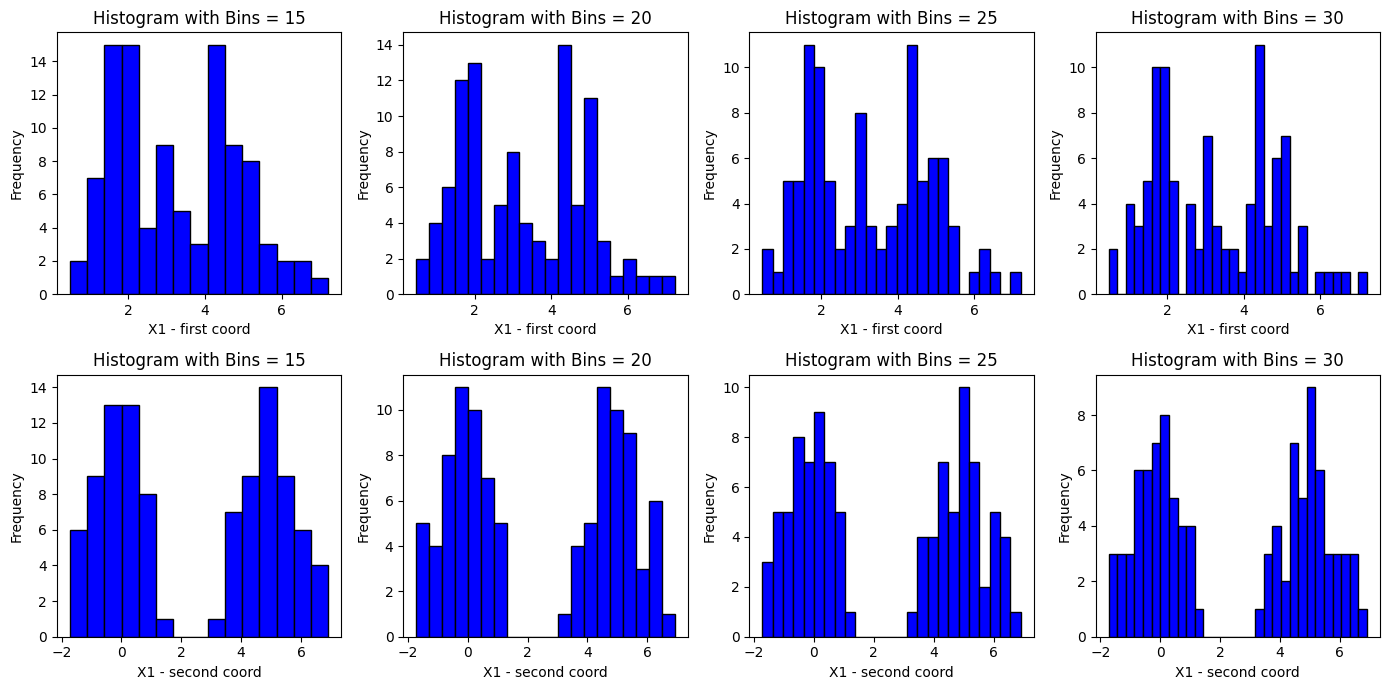

In [389]:
histogram(X1, 'X1')

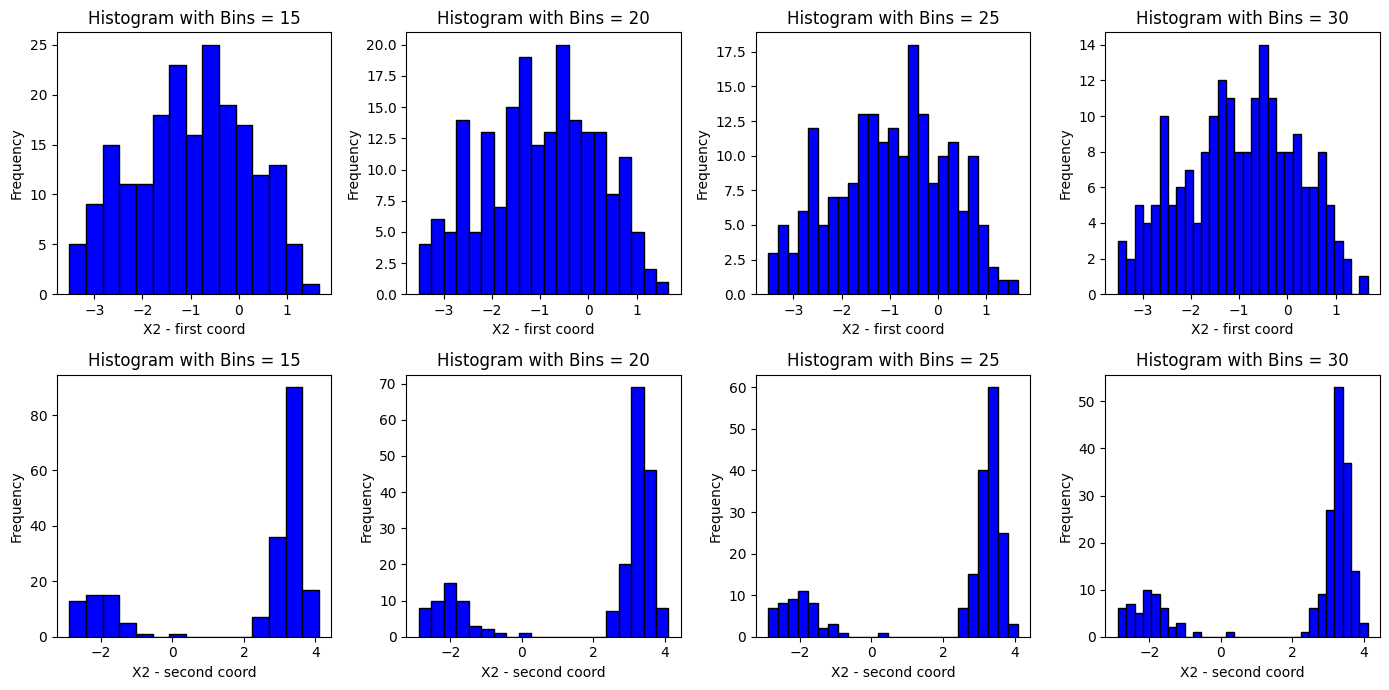

In [390]:
histogram(X2, 'X2')

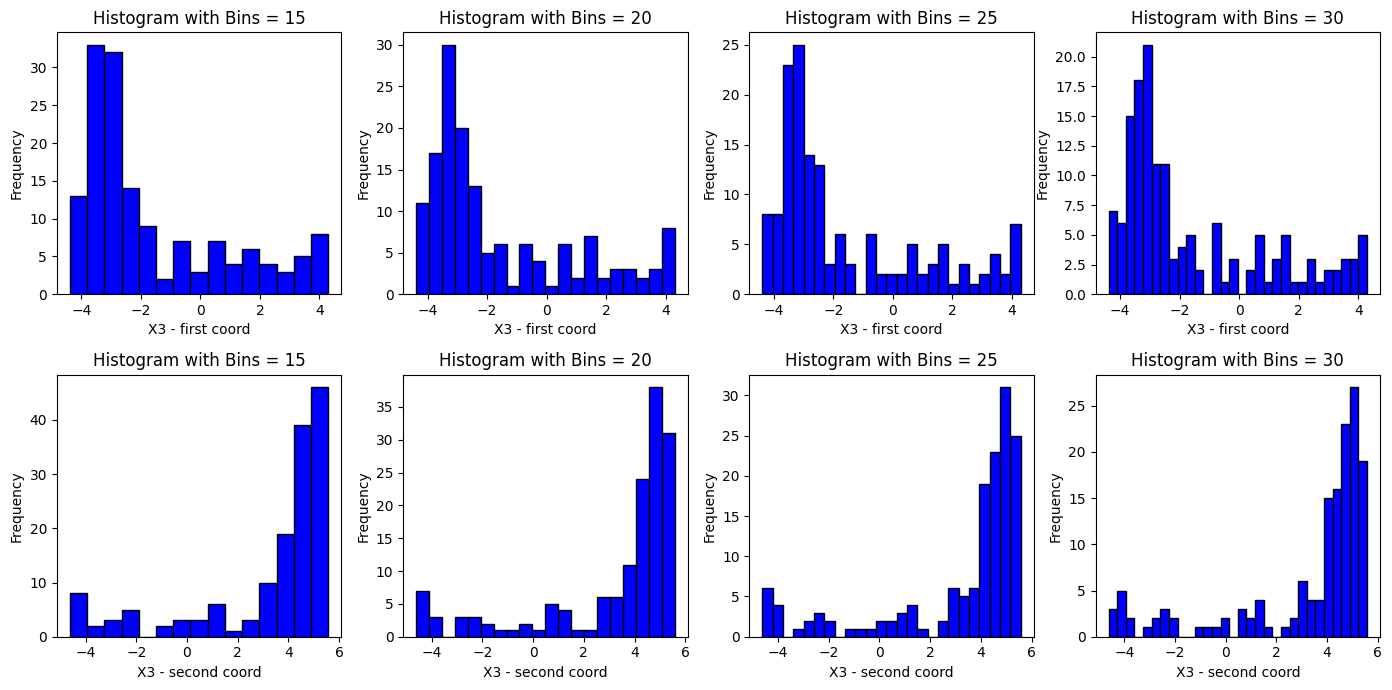

In [391]:
histogram(X3, 'X3')

Далее приведены точечные оценки каждого из классов.

In [392]:
pd.DataFrame(X1).describe()

,0,1
count,100.000000,100.000000
mean,3.270994,2.402830
std,1.582879,2.718541
min,0.468047,-1.724315
25%,1.830120,-0.116062
50%,3.134369,2.239980
75%,4.502442,4.969880
max,7.222301,6.911565


In [393]:
pd.DataFrame(X2).describe()

,0,1
count,200.000000,200.000000
mean,-0.988521,1.977155
std,1.170625,2.321609
min,-3.516411,-2.875268
25%,-1.804113,1.908514
50%,-0.927875,3.201310
75%,-0.113653,3.416461
max,1.662905,4.096727


In [394]:
pd.DataFrame(X3).describe()

,0,1
count,150.000000,150.000000
mean,-1.570193,3.197142
std,2.479014,2.833721
min,-4.386143,-4.619487
25%,-3.372743,2.946194
50%,-2.711284,4.398609
75%,-0.120681,4.997605
max,4.297639,5.578572


In [395]:
pd.DataFrame(X1).corr()

,0,1
0,1.000000,0.828932
1,0.828932,1.000000


In [396]:
pd.DataFrame(X2).corr()

,0,1
0,1.000000,0.638918
1,0.638918,1.000000


In [397]:
pd.DataFrame(X3).corr()

,0,1
0,1.000000,-0.279703
1,-0.279703,1.000000


Text(0.5, 1.0, 'box-and-whisker')

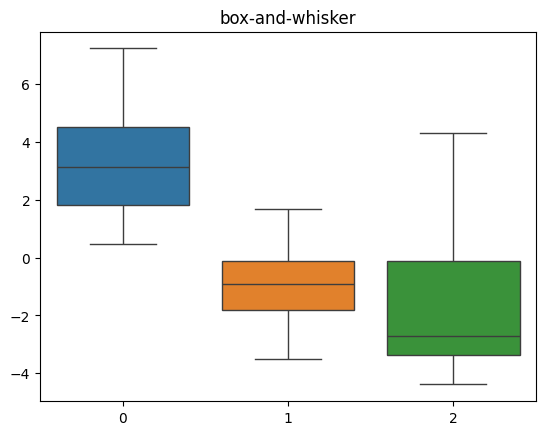

In [398]:
sns.boxplot(data=[X1[:,0], X2[:,0], X3[:,0]]).set_title('box-and-whisker')

Text(0.5, 1.0, 'box-and-whisker')

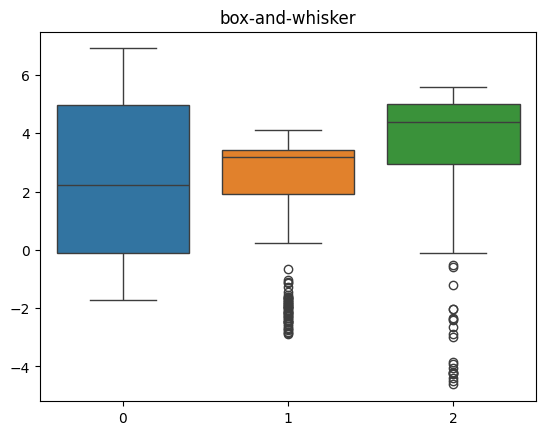

In [399]:
sns.boxplot(data=[X1[:,1], X2[:,1], X3[:,1]]).set_title('box-and-whisker')

In [400]:
labels = np.hstack((np.ones(n[0]), 2 * np.ones(n[1]), 3 * np.ones(n[2])))

# Split the targets into training/testing sets
X_train, X_test, labels_train, labels_test = train_test_split(X, labels, test_size=0.4)

Здесь предоставлено идеальное распределение по классам для обучающей выборки.

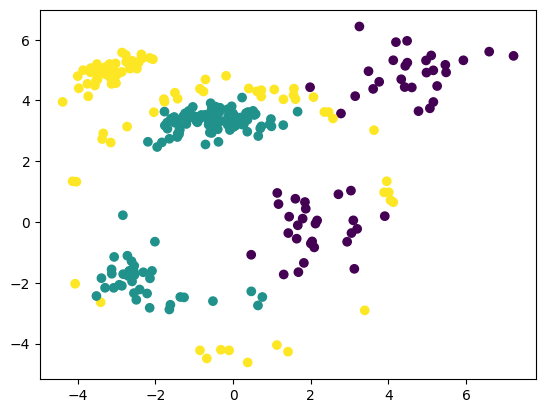

In [401]:
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=labels_train)

In [402]:
train = pd.DataFrame({'x1': X_train[:, 0], 'x2': X_train[:, 1],'labels': labels_train})
train

,x1,x2,labels
0,-1.433218,2.798015,2.0
1,-0.353048,3.617589,2.0
2,-0.081044,3.028693,2.0
3,3.145534,4.142753,1.0
4,0.755098,-2.465590,2.0
...,...,...,...
265,-0.391514,3.053531,2.0
266,4.603570,4.429288,1.0
267,4.194621,5.919479,1.0
268,-1.763155,3.959693,3.0


In [403]:
n_point = 100
x = np.linspace(np.min(X_train[:,0]), np.max(X_train[:,0]), n_point)
y = np.linspace(np.min(X_train[:,1]), np.max(X_train[:,1]), n_point)
xv, yv = np.meshgrid(x, y)

Здесь построена функция, строющую одномерную (для каждого из признаков отдельно) непараметрическую плотность распределения при разных функциях ядра. Ширину окон берём по правилу Сильвермана. Каждый график построен для двух осей, один - для области определения текущего класса, другой - для области определения всей выборки. Это нужно, чтобы сравнить с гистограммами распределения (иначе для некоторых случаев маштаб мешает наблюдать сходство).

In [404]:
# Kernel density estimation
from sklearn.neighbors import KernelDensity

def KernelDensity_general_plot(X_train, labels_train, n_point, x, y, label):
  x1 = np.linspace(np.min(X_train[labels_train == label,0]), np.max(X_train[labels_train == label,0]), n_point)
  y1 = np.linspace(np.min(X_train[labels_train == label,1]), np.max(X_train[labels_train == label,1]), n_point)

  kernels = ['tophat', 'gaussian',  'epanechnikov', 'linear']
  n_kernels = 4


  for i, kernel_i in enumerate(kernels):
      kde = KernelDensity(kernel = kernel_i, bandwidth='silverman').fit(X_train[labels_train == label, 0].reshape(-1, 1))

      f1 = kde.score_samples(x1.reshape(-1, 1))
      f = kde.score_samples(x.reshape(-1, 1))

      plt.figure(figsize = (30, 20))
      plt.subplot(n_kernels, 4, i * n_kernels + 1).plot(x1, np.exp(f1), c = 'C' + str(i))
      plt.subplot(n_kernels, 4, i * n_kernels + 2).plot(x, np.exp(f), c = 'C' + str(i))
      plt.subplot(n_kernels, 4, i * n_kernels + 1).set_title('X1 distribution density in first coord (in own scope of definition) - ' + kernel_i, size = 10)
      plt.subplot(n_kernels, 4, i * n_kernels + 2).set_title('X1 distribution density in first coord (in general scope of definition) - ' + kernel_i, size = 10)

      kde = KernelDensity(kernel = kernel_i, bandwidth='silverman').fit(X_train[labels_train == label, 1].reshape(-1, 1))

      f1 = kde.score_samples(y1.reshape(-1, 1))
      f = kde.score_samples(y.reshape(-1, 1))

      plt.subplot(n_kernels, 4, i * n_kernels + 3).plot(y1, np.exp(f1), c = 'C' + str(i))
      plt.subplot(n_kernels, 4, i * n_kernels + 4).plot(y, np.exp(f), c = 'C' + str(i))
      plt.subplot(n_kernels, 4, i * n_kernels + 3).set_title('X1 distribution density in second coord (in own scope of definition) - ' + kernel_i, size = 10)
      plt.subplot(n_kernels, 4, i * n_kernels + 4).set_title('X1 distribution density in second coord (in general scope of definition) - ' + kernel_i, size = 10)


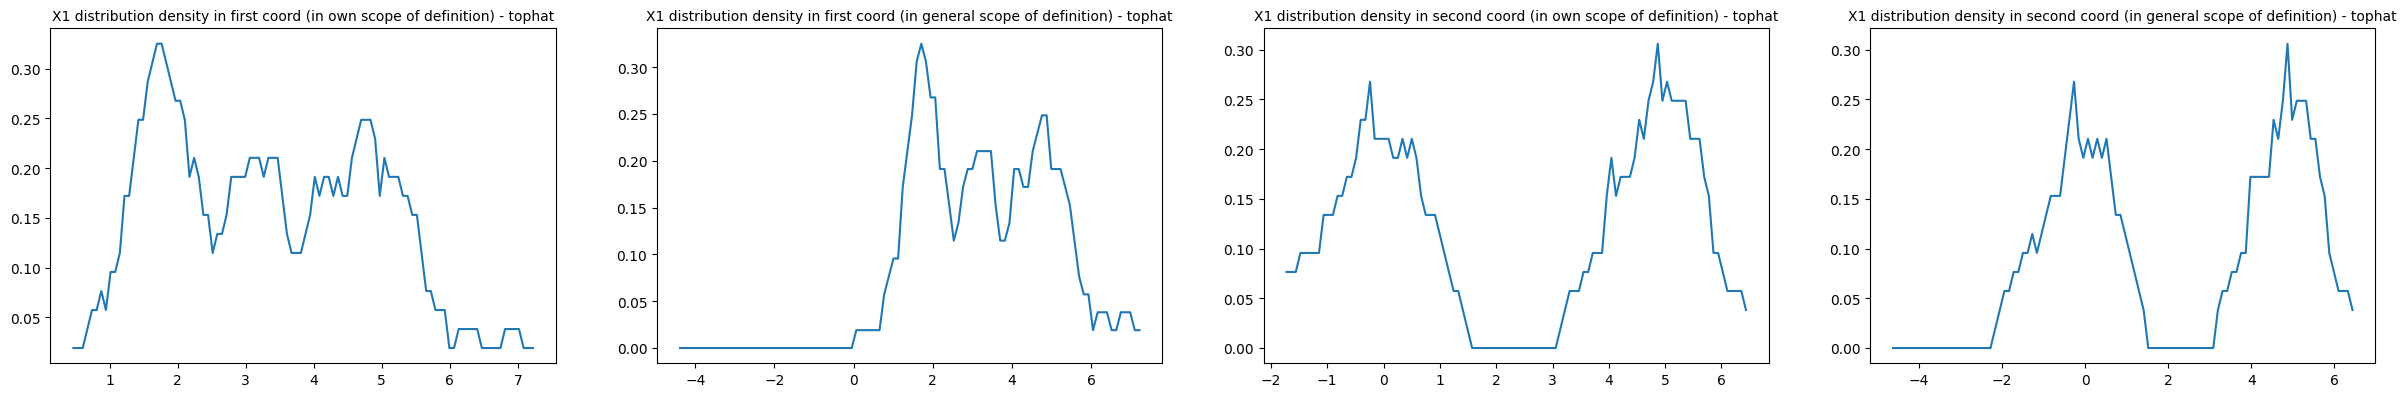

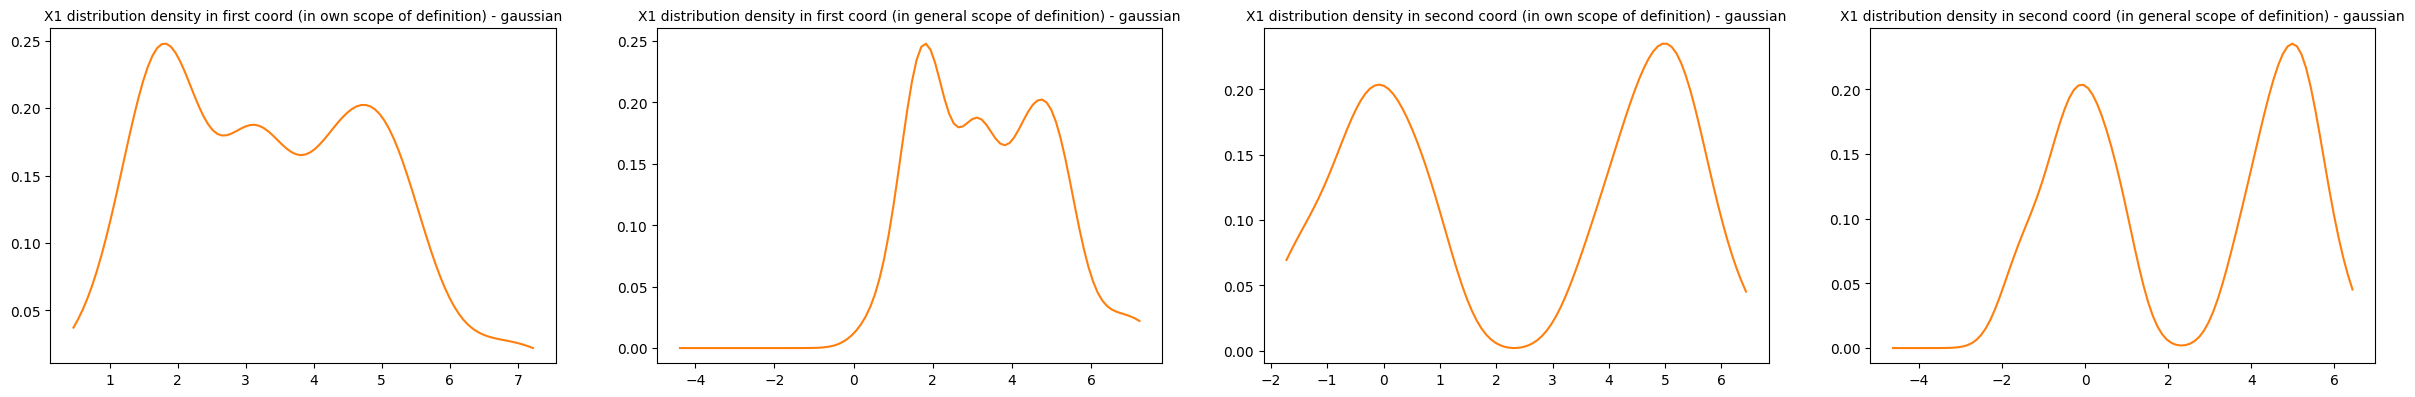

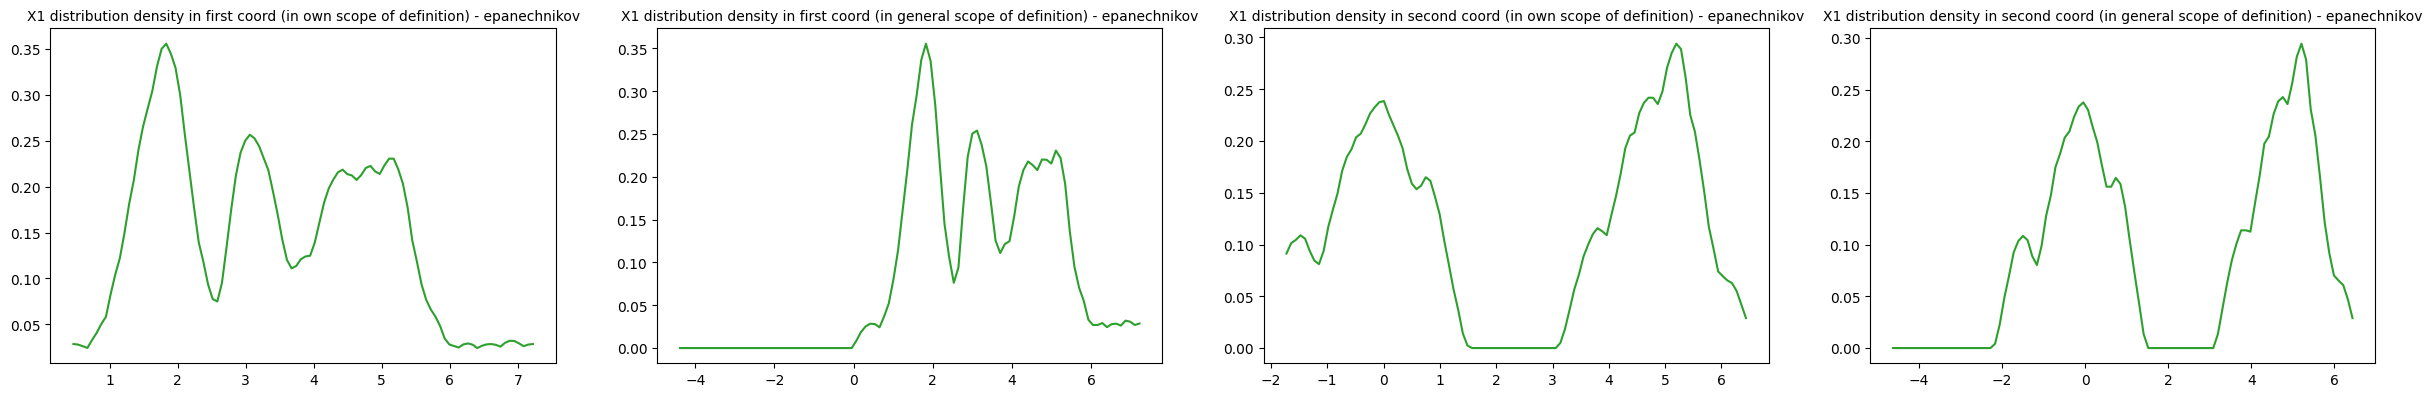

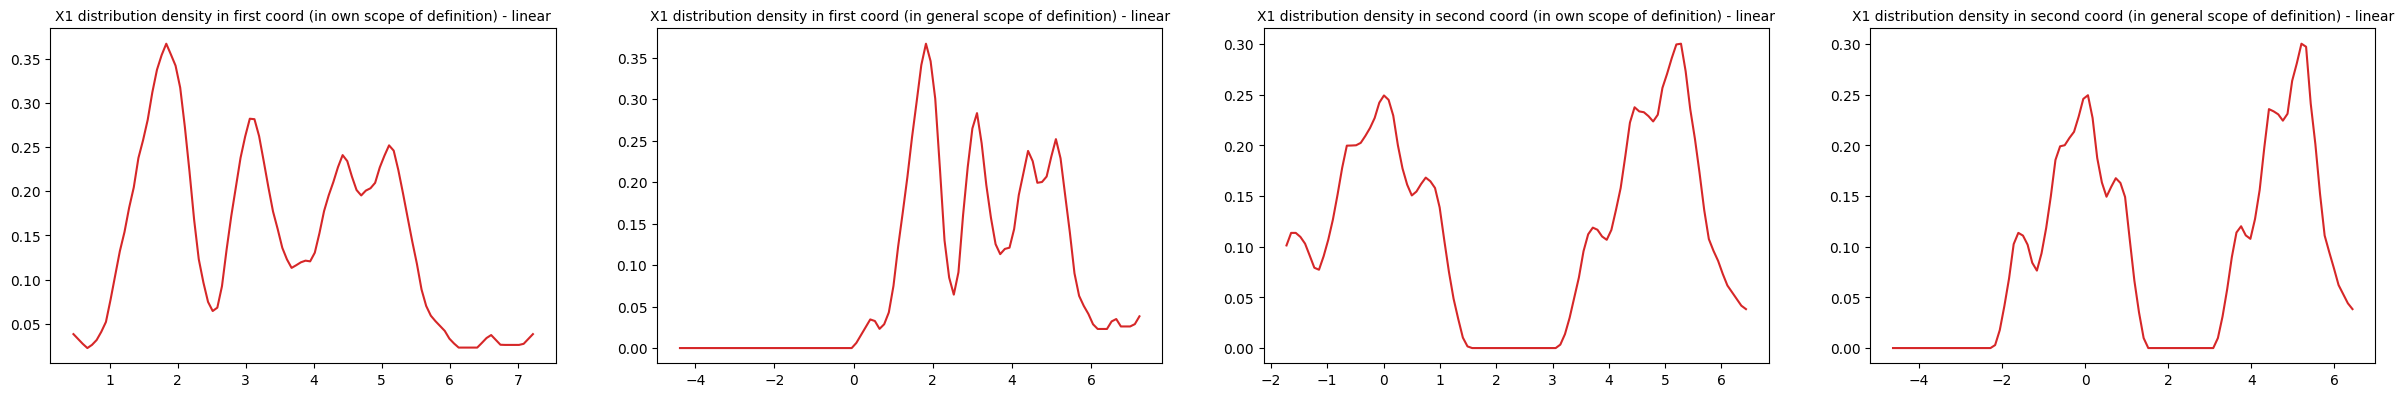

In [405]:
KernelDensity_general_plot(X_train, labels_train, n_point, x, y, 1)

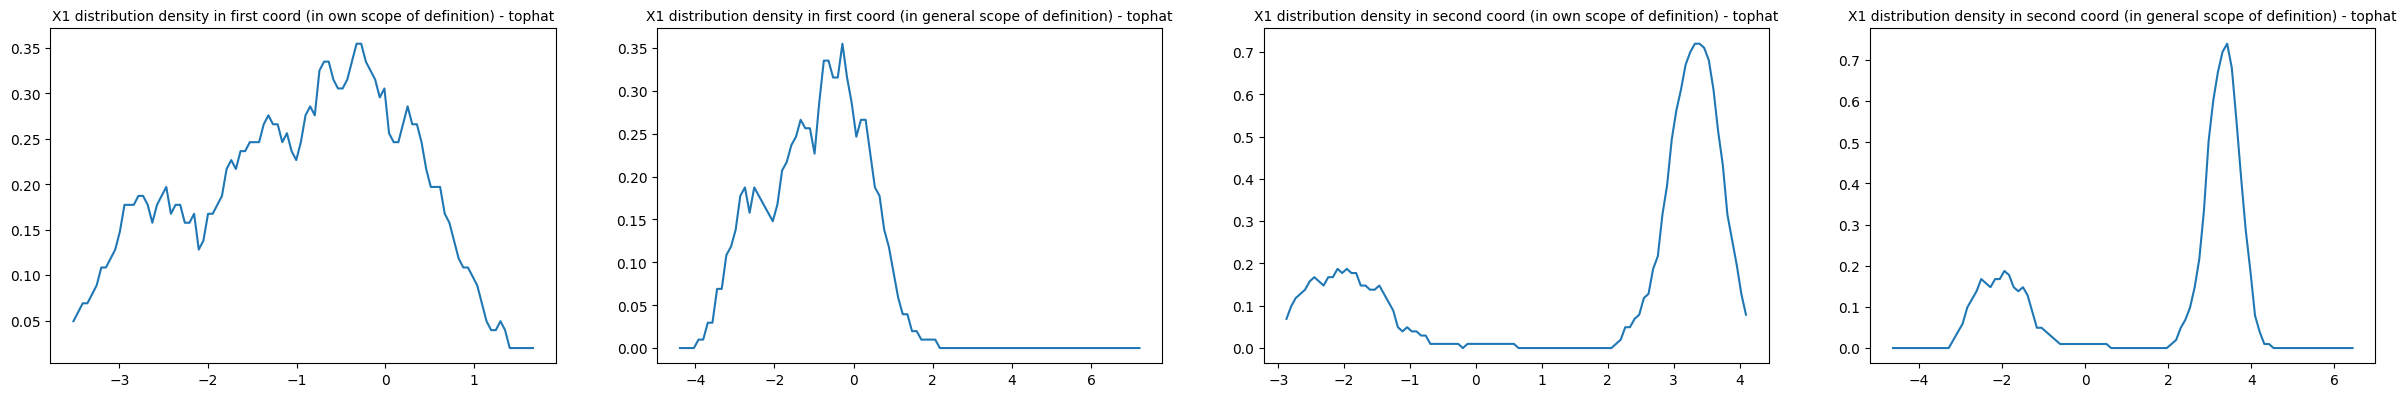

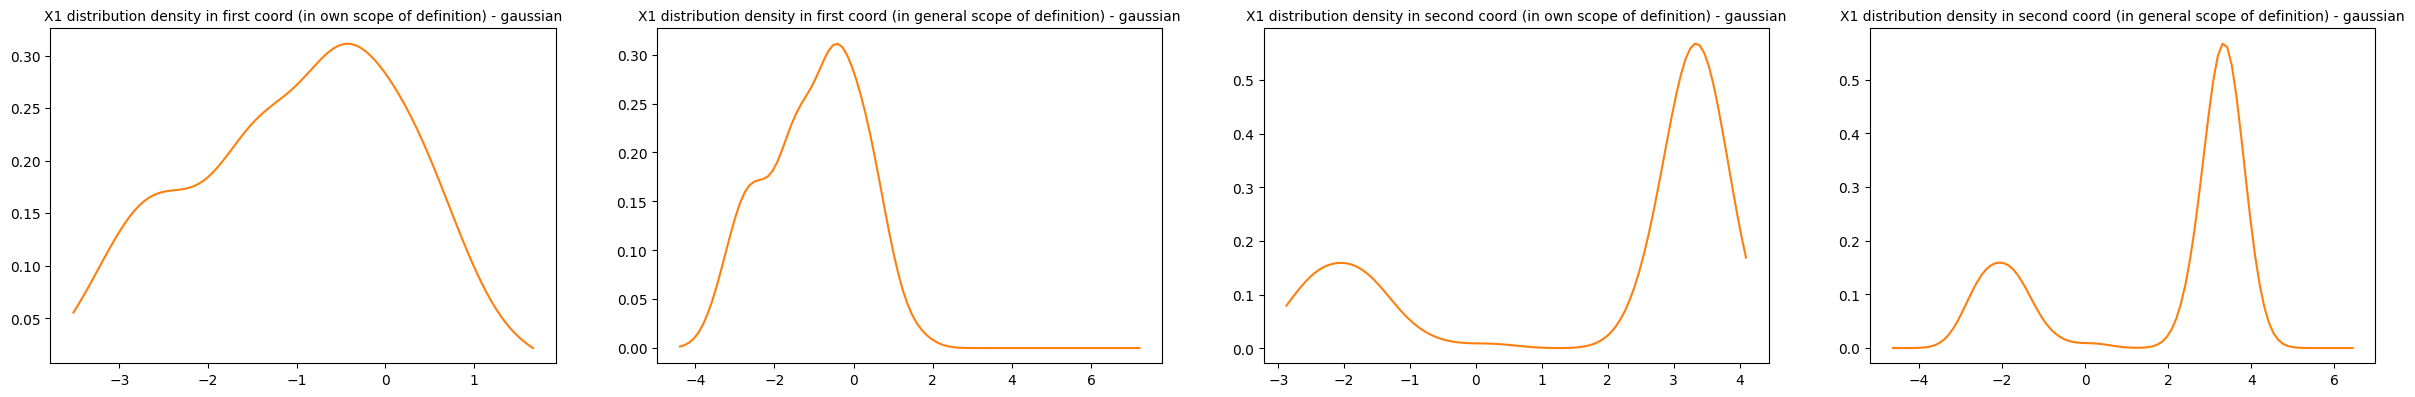

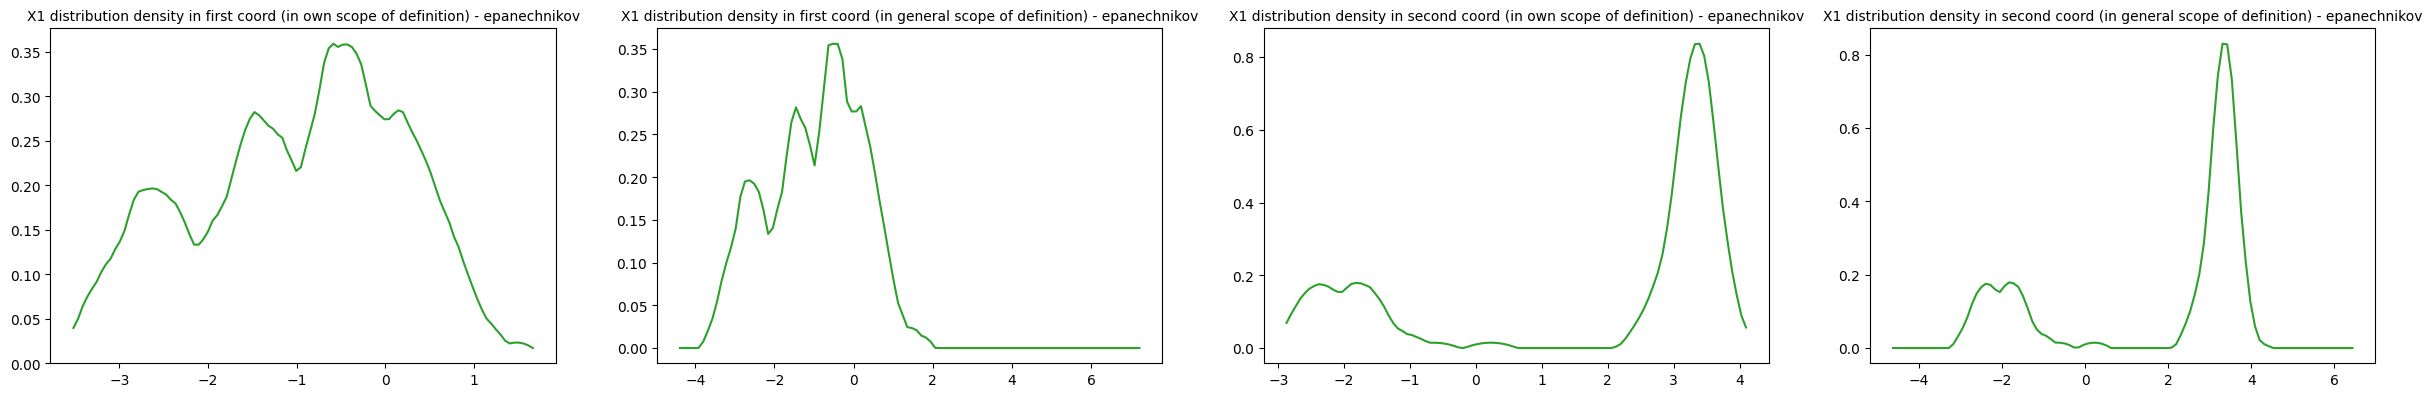

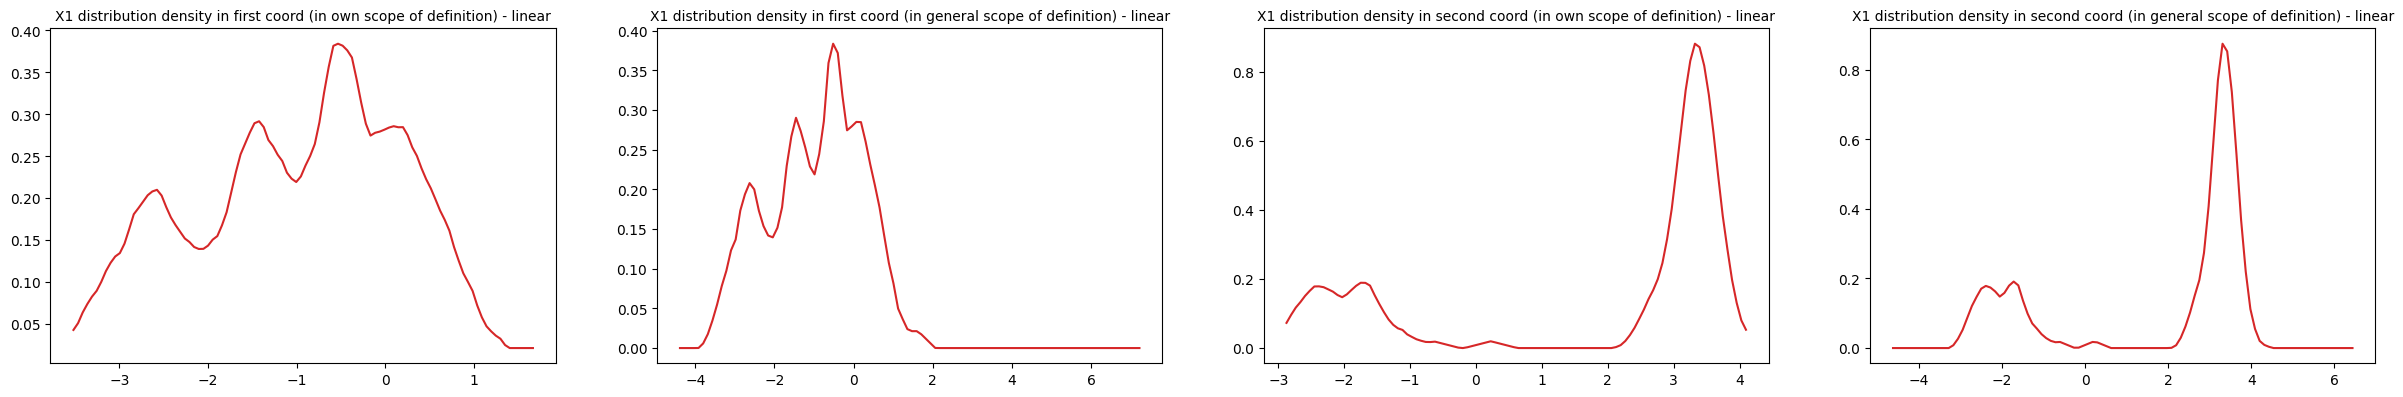

In [406]:
KernelDensity_general_plot(X_train, labels_train, n_point, x, y, 2)

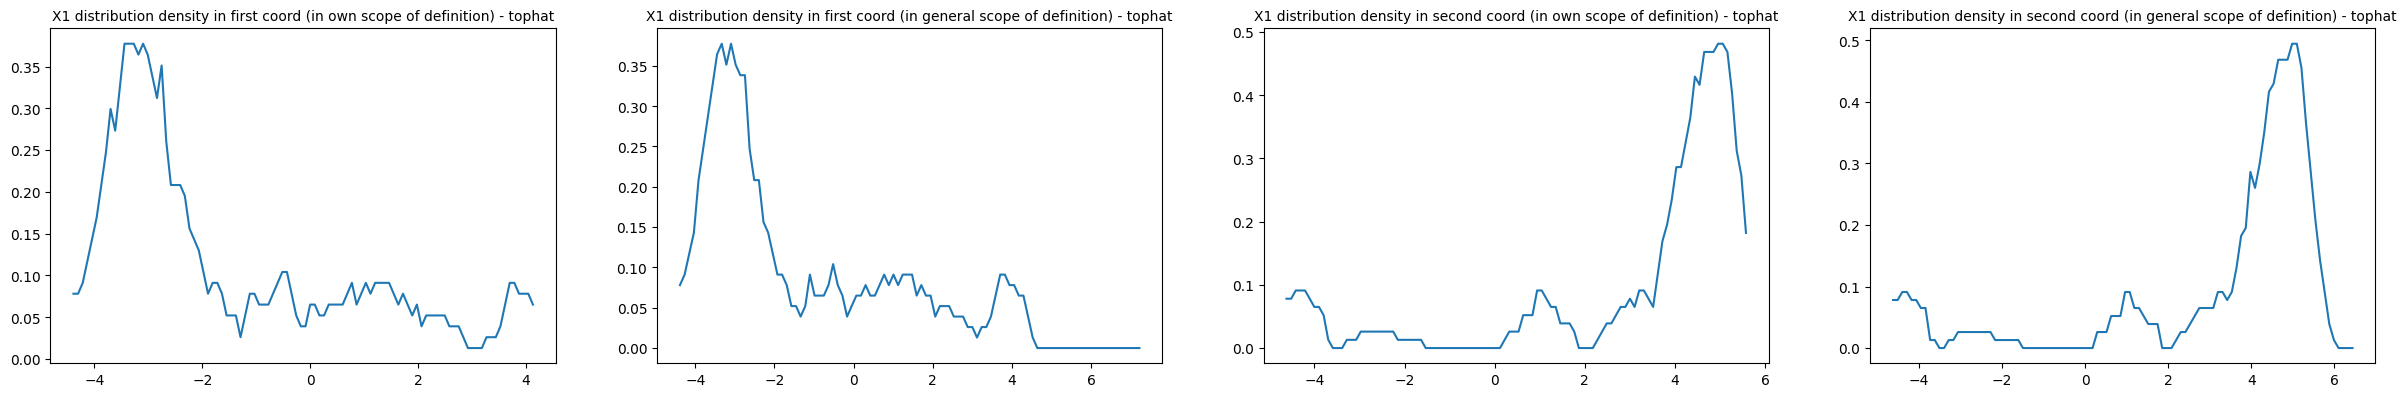

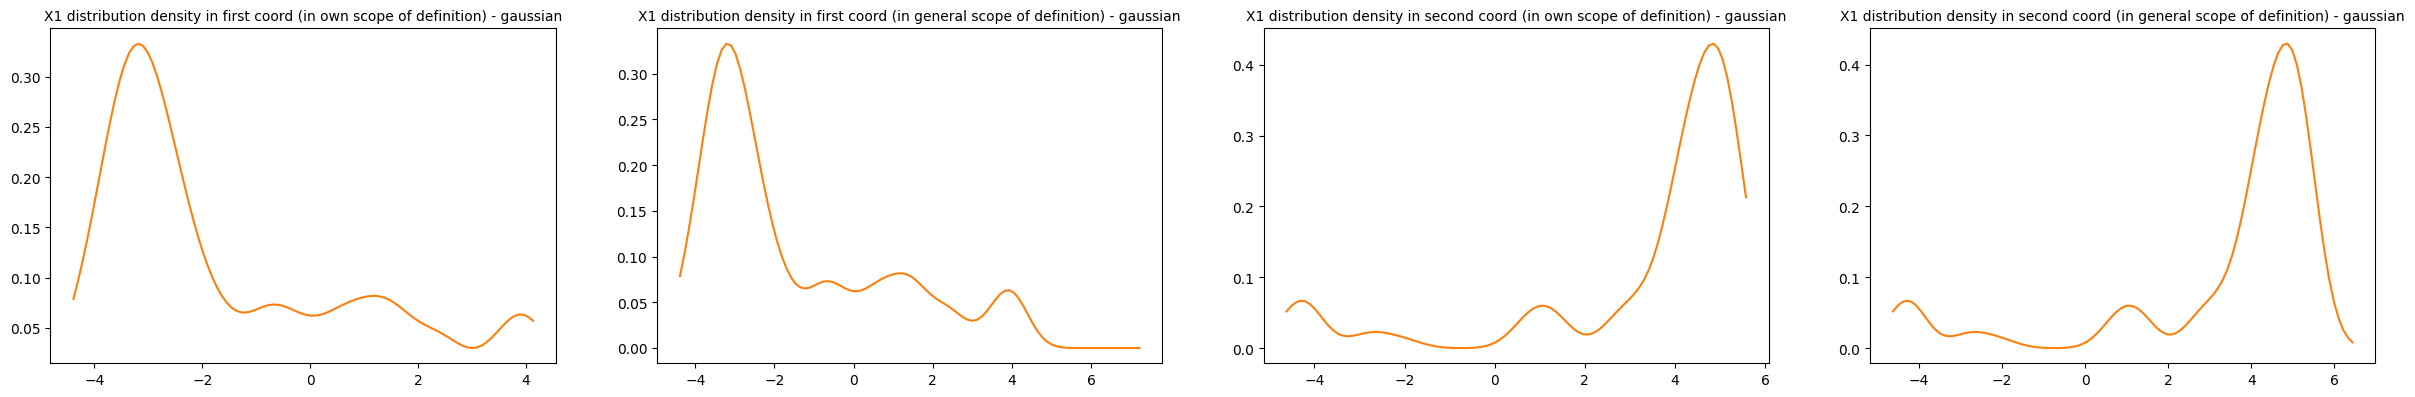

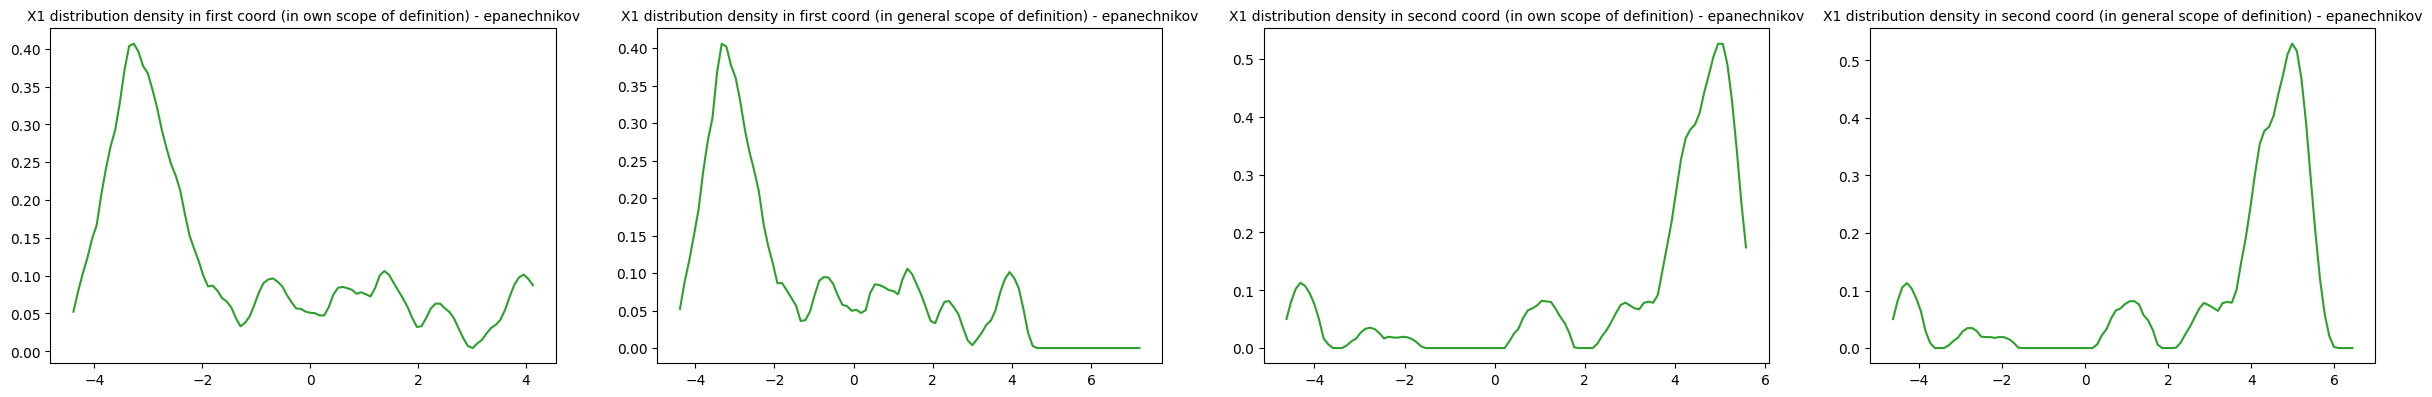

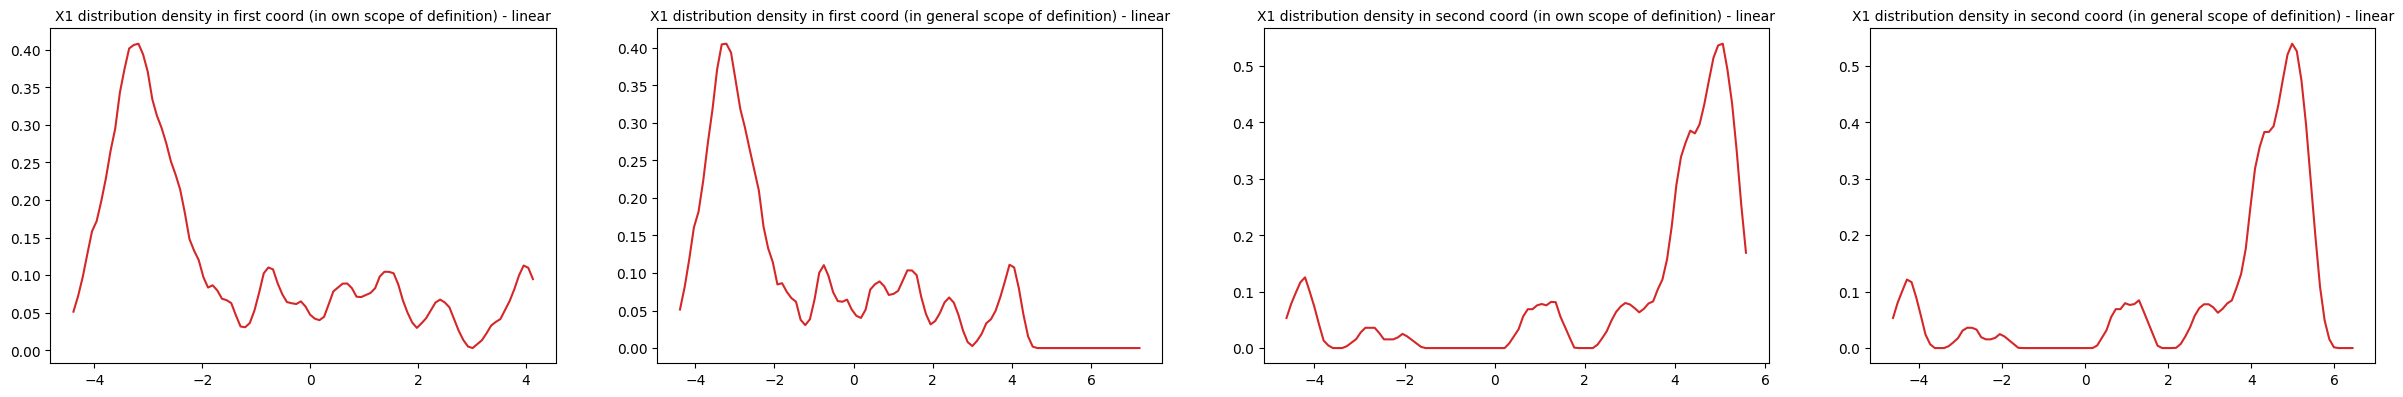

In [407]:
KernelDensity_general_plot(X_train, labels_train, n_point, x, y, 3)

Далее предоставлена функция, оценивающая по предоставленной обучающей и тестовой выборке (и lambla - отношение ширины окна к ширине Сильвермана, по умолчанию - 1) точность на обучающей и тестовой выборках для каждого из типов окон.

In [408]:
# Classification
def KernelDensity_general_accuracy(X_train, labels_train, X_test, labels_test, lamb = 1):
  kernels = ['tophat', 'gaussian',  'epanechnikov', 'linear']
  n_kernels = 4
  np.ones((2, 2, 3))
  df = pd.DataFrame(columns = kernels, index = ['train', 'test'])
  for i, kernel_i in enumerate(kernels):
    f_test = [0] * k
    f_train = [0] * k
    p = [0] * k
    for j in range(k):
      #As in KernelDensity
      h_sil = (X_train[labels_train == j + 1].shape[0] * (X_train[labels_train == j + 1].shape[1] + 2) / 4) ** (-1 / (X_train[labels_train == j + 1].shape[1] + 4))

      #As in KernelDensity
      #h_sil = 0.9 * min(X_train[labels_train == j + 1].std(), (np.quantile(X_train[labels_train == j + 1], 0.75) - np.quantile(X_train[labels_train == j + 1], 0.25)) / 1.34) * (len(X_train[labels_train == j + 1]) ** (-0.2))

      kde = KernelDensity(kernel = kernel_i, bandwidth = lamb * h_sil).fit(X_train[labels_train == j + 1])
      #kde = KernelDensity(kernel = kernel_i, bandwidth = 'silverman').fit(X_train[labels_train == j + 1])
      p[j] = len(labels_train[labels_train == j + 1]) / len(labels_train)
      f_train[j] = np.exp(kde.score_samples(X_train)) * p[j]
      f_test[j] = np.exp(kde.score_samples(X_test)) * p[j]

    labels_train_predict = np.array([np.argmax(np.array([f_train[0][i], f_train[1][i],f_train[2][i]])) + 1 for i in range(len(f_train[0]))])
    labels_test_predict = np.array([np.argmax(np.array([f_test[0][i], f_test[1][i],f_test[2][i]])) + 1 for i in range(len(f_test[0]))])

    acc_train = np.sum(labels_train_predict == labels_train) / len(labels_train)
    acc_test = np.sum(labels_test_predict == labels_test) / len(labels_test)

    df.iat[0, i] = acc_train
    df.iat[1, i] = acc_test
  return df

Здесь показана точность для нашей обучающей и тестовой выборке, однако, чтобы оценить значение точности далее будет предоставлены данные при разбиении обучающей выборки на обучающую и валидационную.

In [409]:
df = KernelDensity_general_accuracy(X_train, labels_train, X_test, labels_test)
df

,tophat,gaussian,epanechnikov,linear
train,0.988889,0.951852,0.996296,0.996296
test,0.894444,0.944444,0.894444,0.894444


Здесь запускается функция расчета точности для разных разбиений (всего 50)

In [410]:
n = 50
accuracy = [0] * n
for i in range(n):
  X_train_k, X_test_k, labels_train_k, labels_test_k = train_test_split(X_train, labels_train,  random_state = i * 2, test_size = 0.4)
  df = KernelDensity_general_accuracy(X_train_k, labels_train_k, X_test_k, labels_test_k)
  accuracy[i] = df
accuracy_test = pd.concat(accuracy).loc[['test']]
accuracy_train = pd.concat(accuracy).loc[['train']]

In [411]:
accuracy_train.head()

,tophat,gaussian,epanechnikov,linear
train,0.987654,0.969136,0.993827,0.993827
train,0.981481,0.95679,0.993827,0.993827
train,0.987654,0.950617,0.993827,0.993827
train,0.981481,0.950617,0.993827,1.0
train,0.981481,0.938272,1.0,1.0


In [412]:
accuracy_test.head()

,tophat,gaussian,epanechnikov,linear
test,0.87963,0.87963,0.888889,0.888889
test,0.87037,0.898148,0.87037,0.87037
test,0.944444,0.972222,0.944444,0.944444
test,0.935185,0.916667,0.925926,0.925926
test,0.953704,0.972222,0.944444,0.944444


Здесь предоставлены среднее значение и ср. кв. отклонение точности для каждого из типов окон. Можно заметить, что среднее знаечение на тестовой выборки больше всего у гауссовского окна, что показывает, что это модель лучше (тк лучше на неизвестных модели данных). Несмотря на то, что на тестовой выборке лучшие показатели прямоугольного окна, на новых данных оно работает хуже.

In [413]:
df = pd.DataFrame()
df['acc_train_mean'] = accuracy_train.mean()
df['acc_test_mean'] = accuracy_test.mean()
df['acc_train_std'] = accuracy_train.std()
df['acc_test_std'] = accuracy_test.std()
df

,acc_train_mean,acc_test_mean,acc_train_std,acc_test_std
tophat,0.984815,0.907222,0.006136,0.033749
gaussian,0.955432,0.927778,0.008485,0.024462
epanechnikov,0.995309,0.904815,0.003856,0.032564
linear,0.998272,0.905185,0.002800,0.031832


Построение зависимости от lambda - отношении ширины парзеновского окна к ширине Сильвермана

In [414]:
lambs =  np.hstack((np.linspace(0.1, 5, 50), np.linspace(5, 10, 6)))
acc_train_mean = pd.DataFrame()
acc_test_mean = pd.DataFrame()
acc_train_std = pd.DataFrame()
acc_test_std = pd.DataFrame()

for j in range(len(lambs)):
  n = 50
  accuracy = [0] * n
  for i in range(n):
    X_train_k, X_test_k, labels_train_k, labels_test_k = train_test_split(X_train, labels_train,  random_state = i * 2, test_size = 0.4)
    df = KernelDensity_general_accuracy(X_train_k, labels_train_k, X_test_k, labels_test_k, lamb = lambs[j])
    accuracy[i] = df
  accuracy_test = pd.concat(accuracy).loc[['test']]
  accuracy_train = pd.concat(accuracy).loc[['train']]
  acc_train_mean[j] = accuracy_train.mean()
  acc_test_mean[j] = accuracy_test.mean()
  acc_train_std[j] = accuracy_train.std()
  acc_test_std[j] = accuracy_train.std()

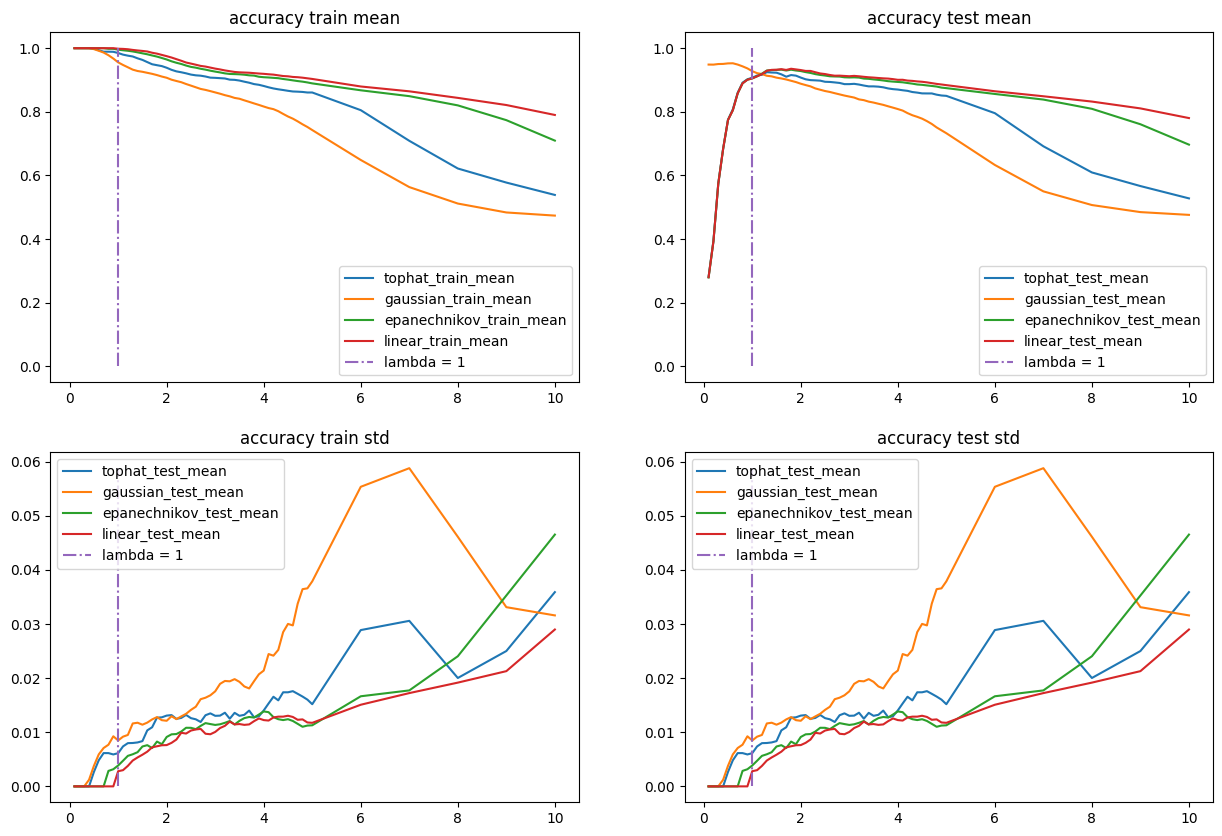

In [415]:
kernels = ['tophat', 'gaussian',  'epanechnikov', 'linear']
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1).plot(lambs, acc_train_mean.T['tophat'], label = 'tophat_train_mean')
plt.subplot(2, 2, 1).plot(lambs, acc_train_mean.T['gaussian'], label = 'gaussian_train_mean')
plt.subplot(2, 2, 1).plot(lambs, acc_train_mean.T['epanechnikov'], label = 'epanechnikov_train_mean')
plt.subplot(2, 2, 1).plot(lambs, acc_train_mean.T['linear'], label = 'linear_train_mean')
plt.subplot(2, 2, 1).plot([1, 1], [0, 1], label = 'lambda = 1', linestyle = '-.')
plt.subplot(2, 2, 1).set_title("accuracy train mean")
plt.subplot(2, 2, 1).legend()

plt.subplot(2, 2, 2).plot(lambs, acc_test_mean.T['tophat'], label = 'tophat_test_mean')
plt.subplot(2, 2, 2).plot(lambs, acc_test_mean.T['gaussian'], label = 'gaussian_test_mean')
plt.subplot(2, 2, 2).plot(lambs, acc_test_mean.T['epanechnikov'], label = 'epanechnikov_test_mean')
plt.subplot(2, 2, 2).plot(lambs, acc_test_mean.T['linear'], label = 'linear_test_mean')
plt.subplot(2, 2, 2).plot([1, 1], [0, 1], label = 'lambda = 1', linestyle = '-.')
plt.subplot(2, 2, 2).set_title("accuracy test mean")
plt.subplot(2, 2, 2).legend()

plt.subplot(2, 2, 3).plot(lambs, acc_train_std.T['tophat'], label = 'tophat_test_mean')
plt.subplot(2, 2, 3).plot(lambs, acc_train_std.T['gaussian'], label = 'gaussian_test_mean')
plt.subplot(2, 2, 3).plot(lambs, acc_train_std.T['epanechnikov'], label = 'epanechnikov_test_mean')
plt.subplot(2, 2, 3).plot(lambs, acc_train_std.T['linear'], label = 'linear_test_mean')
plt.subplot(2, 2, 3).plot([1, 1], [0, max([acc_train_std[i].max() for i in range(acc_test_std.shape[1])])], label = 'lambda = 1', linestyle = '-.')
plt.subplot(2, 2, 3).set_title("accuracy train std")
plt.subplot(2, 2, 3).legend()

plt.subplot(2, 2, 4).plot(lambs, acc_test_std.T['tophat'], label = 'tophat_test_mean')
plt.subplot(2, 2, 4).plot(lambs, acc_test_std.T['gaussian'], label = 'gaussian_test_mean')
plt.subplot(2, 2, 4).plot(lambs, acc_test_std.T['epanechnikov'], label = 'epanechnikov_test_mean')
plt.subplot(2, 2, 4).plot(lambs, acc_test_std.T['linear'], label = 'linear_test_mean')
plt.subplot(2, 2, 4).plot([1, 1], [0, max([acc_test_std[i].max() for i in range(acc_test_std.shape[1])])], label = 'lambda = 1', linestyle = '-.')
plt.subplot(2, 2, 4).set_title("accuracy test std")
plt.subplot(2, 2, 4).legend()

plt.show()

Выше предоставлены графики зависимости точности (среднего значения и отклонения) от типа окна и lambda. Максимальное среднее значение достигается для Гауссовского окна, при lambda чуть менее 1. У остальных - пик приходится в районе 1 (чуть больше). Ср. кв. отколнение растёт при увеличении lambda, то есть наблюдаетя бОльшая зависимость от обучающей выборки.

Ниже представлены результаты, при каких lambda точность будет в среднем максимальна (шаг по 0.1)

In [416]:
 pd.DataFrame([
     [acc_test_mean.T.iloc[:,i].max() for i in range(acc_test_mean.shape[0])],
     [lambs[acc_test_mean.T.iloc[:,i].idxmax()] for i in range(acc_test_mean.shape[0])]
     ], columns = ['tophat', 'gaussian',  'epanechnikov', 'linear'], index = ['max accuracy mean', 'lambda max'])

,tophat,gaussian,epanechnikov,linear
max accuracy mean,0.92463,0.952593,0.932593,0.93537
lambda max,1.30000,0.600000,1.600000,1.80000


In [417]:
n_point = 100
x = np.linspace(np.min(X_train[:,0]), np.max(X_train[:,0]), n_point)
y = np.linspace(np.min(X_train[:,1]), np.max(X_train[:,1]), n_point)
xv, yv = np.meshgrid(x, y)

In [418]:
len(np.vstack((np.ravel(xv), np.ravel(yv))).T)

10000

Далее предоставлено получение построения по обученной модели меток для исходной выборки (обучение по тестовой).

In [419]:
kernels = ['tophat', 'gaussian',  'epanechnikov', 'linear']
n_kernels = 4
lambs_max = [lambs[acc_test_mean.T.iloc[:,i].idxmax()] for i in range(acc_test_mean.shape[0])]
labels_predict_all = [0] * 4
labels_predict_space = [0] * 4
df = pd.DataFrame(columns = kernels, index = ['train', 'test'])
for i, kernel_i in enumerate(kernels):
  f_test = [0] * k
  f_train = [0] * k
  f = [0] * k
  m_labels = [0] * k
  p = [0] * k
  for j in range(k):
    #As in KernelDensity
    h_sil = (X_train[labels_train == j + 1].shape[0] * (X_train[labels_train == j + 1].shape[1] + 2) / 4) ** (-1 / (X_train[labels_train == j + 1].shape[1] + 4))

    #As in KernelDensity
    #h_sil = 0.9 * min(X_train[labels_train == j + 1].std(), (np.quantile(X_train[labels_train == j + 1], 0.75) - np.quantile(X_train[labels_train == j + 1], 0.25)) / 1.34) * (len(X_train[labels_train == j + 1]) ** (-0.2))

    kde = KernelDensity(kernel = kernel_i, bandwidth = lambs_max[i] * h_sil).fit(X_train[labels_train == j + 1])
    #kde = KernelDensity(kernel = kernel_i, bandwidth = 'silverman').fit(X_train[labels_train == j + 1])
    p[j] = len(labels_train[labels_train == j + 1]) / len(labels_train)
    f[j] = np.exp(kde.score_samples(X)) * p[j]
    m_labels[j] = np.exp(kde.score_samples((np.vstack((np.ravel(xv), np.ravel(yv))).T))) * p[j]

  labels_predict_all[i] = np.array([np.argmax(np.array([f[0][i], f[1][i],f[2][i]])) + 1 for i in range(len(f[0]))])

  labels_predict_space[i] = np.array([np.argmax(np.array([ m_labels[0][i],  m_labels[1][i], m_labels[2][i]])) + 1 for i in range(len(m_labels[0]))])

Здесь показано исходное разбиение по классам, ниже - построенное моделью. Ширина окна бралась исходя из максимума точности (выбиралась lambda).

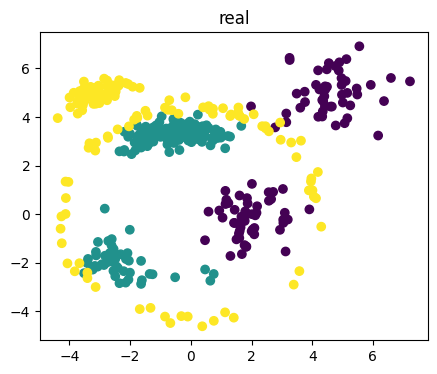

In [420]:
plt.figure(figsize = (5, 4))
plt.scatter(X[:,0], X[:,1], c = labels)
plt.title('real')
plt.show()

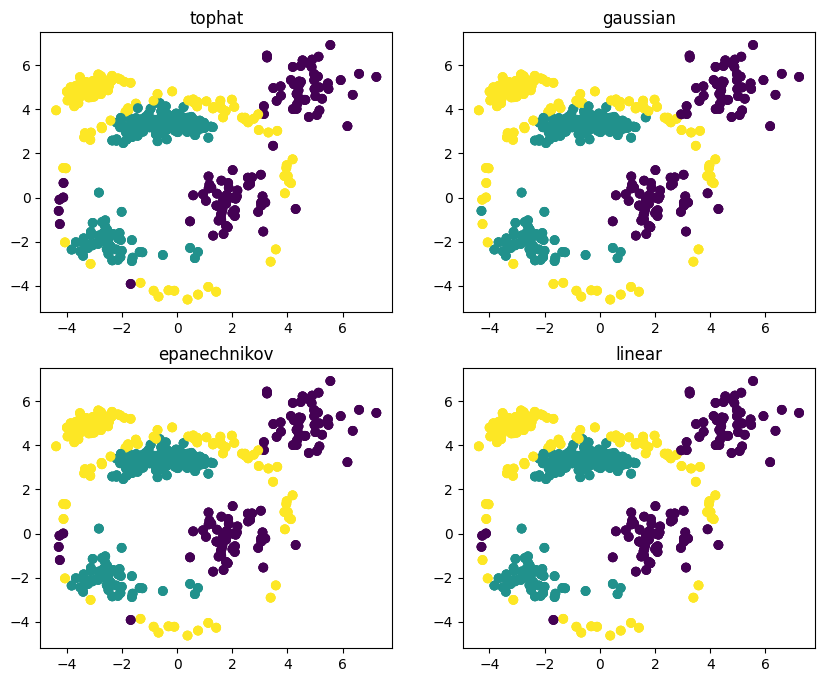

In [421]:
kernels = ['tophat', 'gaussian',  'epanechnikov', 'linear']
n_kernels = 4
plt.figure(figsize = (10, 8))
for i, kernel_i in enumerate(kernels):

  plt.subplot(2, 2, i + 1).scatter(X[:,0], X[:,1], c = labels_predict_all[i])
  plt.subplot(2, 2, i + 1).scatter(X[:,0], X[:,1], c = labels_predict_all[i])
  plt.subplot(2, 2, i + 1).scatter(X[:,0], X[:,1], c = labels_predict_all[i])
  plt.subplot(2, 2, i + 1).set_title(kernel_i)


Можно заметить, что онсновную массу модели распределили одинаково, однако некотрые точки - по-разному.

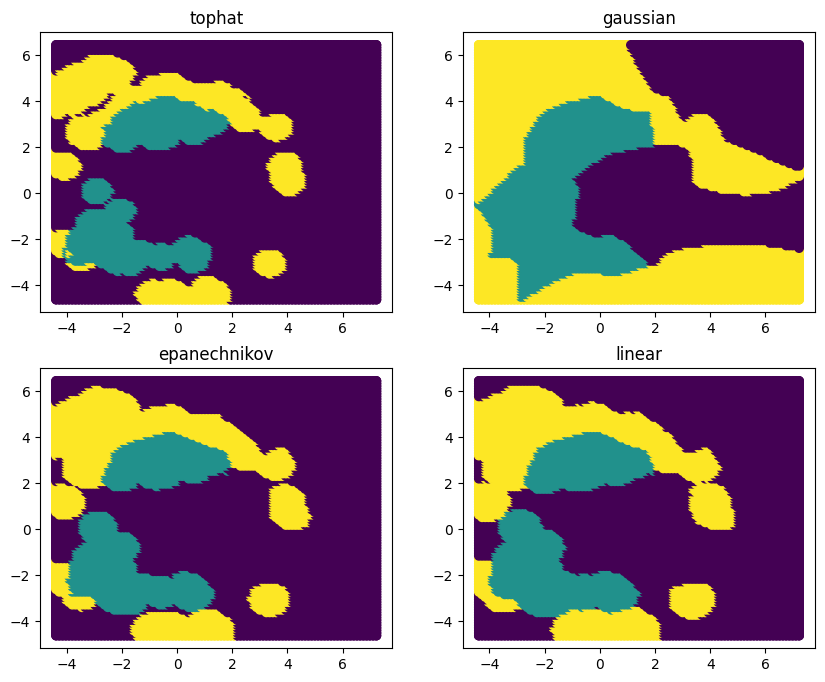

In [422]:
kernels = ['tophat', 'gaussian',  'epanechnikov', 'linear']
n_kernels = 4
plt.figure(figsize = (10, 8))
for i, kernel_i in enumerate(kernels):

  plt.subplot(2, 2, i + 1).scatter(xv, yv, c = labels_predict_space[i])
  plt.subplot(2, 2, i + 1).scatter(xv, yv, c = labels_predict_space[i])
  plt.subplot(2, 2, i + 1).scatter(xv, yv, c = labels_predict_space[i])
  plt.subplot(2, 2, i + 1).set_title(kernel_i)


Выше представлено разбиение пространства на области, в зависимости от типа окна. Можно заметить, что существенно отличается только окно Гаусса. Эта модель дает лучшую точонсть, однако, сама точность отличается не на много.

In [423]:
# Train classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, labels_train)

GaussianNB()

Здесь представлено обучение в предположении о нормальности распределения (что не верно).

In [424]:
labels_train_pred = model.predict(X_train)
labels_test_pred = model.predict(X_test)

# Print accuracies on training and test samples
print('Accuracy on training set:', model.score(X_train, labels_train))
print('Accuracy on test set:', model.score(X_test, labels_test))

Accuracy on training set: 0.8444444444444444
Accuracy on test set: 0.8277777777777777


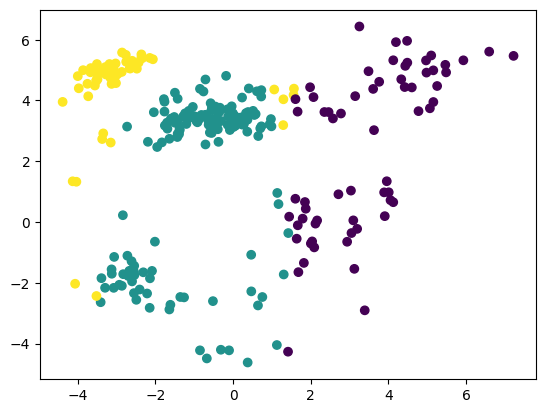

In [425]:
# Plot data
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=labels_train_pred)

Тк разбиение идёт кривыми второго порядка, точность сильно ниже (тк разбиение на самом деле сложнее).

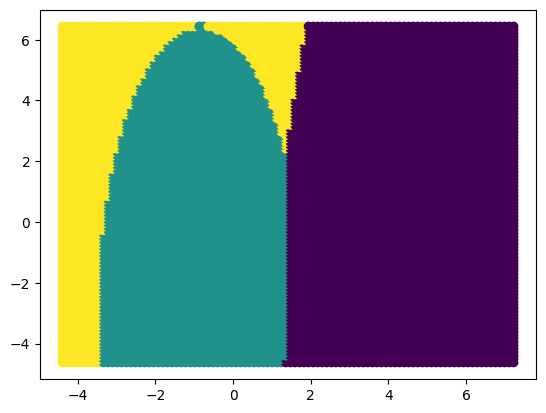

In [426]:
# Plot decision regions
m_labels = model.predict(np.vstack((np.ravel(xv), np.ravel(yv))).T)

plt.figure()
plt.scatter(xv, yv, c=m_labels)

In [427]:
n = 50
accuracy_test = [0] * n
accuracy_train = [0] * n
for i in range(n):
  X_train_k, X_test_k, labels_train_k, labels_test_k = train_test_split(X_train, labels_train,  random_state = i * 2, test_size = 0.4)
  model = GaussianNB()
  model.fit(X_train_k, labels_train_k)
  accuracy_test[i] = model.score(X_test_k, labels_test_k)
  accuracy_train[i] = model.score(X_train_k, labels_train_k)


In [428]:
accuracy_train = np.array(accuracy_train)
accuracy_test = np.array(accuracy_test)

Здесь представлен расчёт среднего значения и ср. кв. отклонения точности (по разным фолдам, совпадающим, с фолдами разбиения в случае обучения непараметрического классификатора). Можно заметить, что точность на тестовой выборке меньше на 0.1, что показывает, что в данном случае непарамметрический подход использовать выгоднее (тк нет четкой подходящей математической модели).

In [429]:
df = pd.DataFrame([[accuracy_train.mean(), accuracy_test.mean(), accuracy_train.std(), accuracy_test.std()]],
                  columns = ['acc_train_mean', 'acc_test_mean', 'acc_train_std', 'acc_test_std'])

df

,acc_train_mean,acc_test_mean,acc_train_std,acc_test_std
0,0.842346,0.82463,0.020592,0.032836


Можно сделать вывод, что максимально хорошо работает непарамметрический Байесовский классификатор с гауссовским окном. Ширина окна существенно влияет на результат, и в среднем максимальное значение точности наблюдается при ширине окна Сильвермана.

In [430]:
from sklearn. linear_model import LogisticRegression
from sklearn import metrics

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train, labels_train)

#use model to make predictions on test data
labels_pred = log_regression.predict(X_test)

print(" Accuracy:",metrics.accuracy_score(labels_test, labels_pred))


 Accuracy: 0.8


In [431]:
n = 50
accuracy_test = [0] * n
accuracy_train = [0] * n
for i in range(n):
  X_train_k, X_test_k, labels_train_k, labels_test_k = train_test_split(X_train, labels_train,  random_state = i * 2, test_size = 0.4)
  log_regression = LogisticRegression()
  log_regression.fit(X_train_k, labels_train_k)
  labels_pred_test = log_regression.predict(X_test_k)
  labels_pred_train = log_regression.predict(X_train_k)
  accuracy_test[i] = metrics.accuracy_score(labels_test_k, labels_pred_test)
  accuracy_train[i] = metrics.accuracy_score(labels_train_k, labels_pred_train)

accuracy_train = np.array(accuracy_train)
accuracy_test = np.array(accuracy_test)

df = pd.DataFrame([[accuracy_train.mean(), accuracy_test.mean(), accuracy_train.std(), accuracy_test.std()]],
                  columns = ['acc_train_mean', 'acc_test_mean', 'acc_train_std', 'acc_test_std'])

df

,acc_train_mean,acc_test_mean,acc_train_std,acc_test_std
0,0.82642,0.805926,0.040809,0.059863


Логистическая регрессия не дала точности лучше, чем непараметрический Байесовский классификатор. Впрочем, как и параметрический с нормальным распределением.